In [1]:
# importing images 

from PIL import Image
import numpy as np
import glob
image_list = glob.glob(r'C:/Users/welcome/Projects/Photovoltaic Fault Detection/elpv-dataset-master/images/*.png')
# for filename in glob.glob(r'C:/Users/welcome/Projects/Photovoltaic Fault Detection/elpv-dataset-master/images/*.png'): #assuming gif
#     im=Image.open(filename)
#     image_list.append(im)
#     print(type(image_list[0]))


images = np.array([np.array(Image.open(fname))for fname in image_list])
print(len(images),type(images), images[0].shape)


2624 <class 'numpy.ndarray'> (300, 300)


In [2]:
# importing labels

import pandas as pd
import numpy as np

labels = pd.read_csv(r"C:/Users/welcome/Projects/Photovoltaic Fault Detection/elpv-dataset-master/labels.csv", header = None)

labels.columns =['Labels'] 

labels_list =labels['Labels']

labels =labels_list

print(type(labels))


<class 'pandas.core.series.Series'>


In [3]:
# comparing number of images with number of labels

if len(labels) == len(images):
    print("Number of labels matches number of images!")
else:
    print("Number of labels does not match number of images, check data directories.")

Number of labels matches number of images!


In [4]:
# Find the unique label values

unique_labels = np.unique(labels)
len(labels)

2624

In [5]:
# converting labels into numerical values
print(labels[0])
labels[0] == unique_labels

images/cell0001.png  1.0                 mono


array([ True, False, False, ..., False, False, False])

In [6]:
# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_labels) for label in labels]
boolean_labels[:2]
boolean_labels = np.array(boolean_labels)
type(boolean_labels)

numpy.ndarray

In [7]:
# Example: Turning a boolean array into integers
print(labels[0]) # original label
print(np.where(unique_labels == labels[0])[0][0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

images/cell0001.png  1.0                 mono
0
0
[1 0 0 ... 0 0 0]


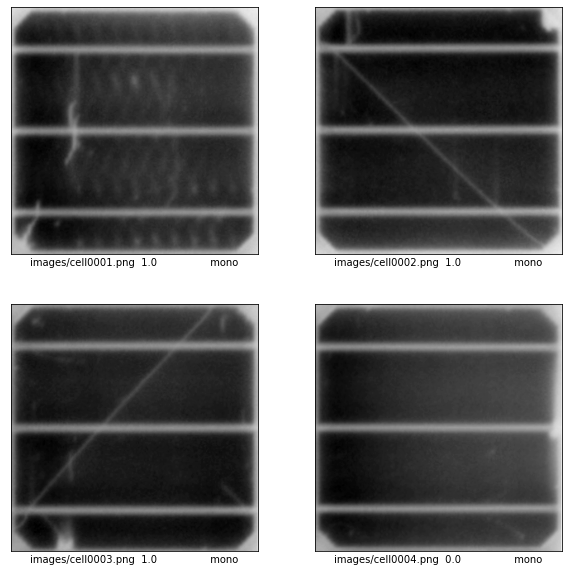

In [8]:
# Displaying images with labels
import matplotlib.pyplot as plt


X= images
y= boolean_labels
class_names = labels

plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[i])


In [9]:
# Splittig data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[10:], y[10:], test_size=0.2, random_state=42)

print(X_train, y_train)

[[[47 46 45 ... 48 49 49]
  [47 46 45 ... 46 48 49]
  [47 46 46 ... 45 46 47]
  ...
  [39 39 39 ... 33 32 31]
  [38 38 38 ... 33 33 32]
  [37 38 38 ... 33 32 32]]

 [[70 72 74 ... 68 67 68]
  [71 75 76 ... 68 70 70]
  [72 73 72 ... 71 70 69]
  ...
  [67 68 70 ... 72 70 70]
  [75 71 75 ... 71 70 69]
  [73 72 74 ... 71 71 73]]

 [[31 31 32 ... 44 45 45]
  [30 31 32 ... 45 44 44]
  [29 30 31 ... 43 44 44]
  ...
  [26 27 28 ... 39 39 39]
  [26 27 28 ... 39 39 39]
  [25 26 28 ... 40 39 39]]

 ...

 [[39 40 40 ... 36 35 35]
  [41 39 38 ... 37 37 38]
  [41 39 39 ... 37 36 36]
  ...
  [45 44 42 ... 41 40 40]
  [44 43 42 ... 40 40 40]
  [44 43 42 ... 40 41 41]]

 [[31 78 79 ... 82 81 81]
  [31 79 79 ... 81 82 81]
  [31 79 79 ... 80 82 82]
  ...
  [79 78 80 ... 79 77 78]
  [79 78 79 ... 78 77 78]
  [80 79 79 ... 77 77 79]]

 [[ 0  0 21 ... 45 46 46]
  [ 0  0 21 ... 46 47 47]
  [ 0  0 22 ... 47 48 48]
  ...
  [ 0  0 22 ... 52 52 53]
  [ 0  0 22 ... 51 52 53]
  [ 0  0 23 ... 51 52 53]]] [[False Fa

In [13]:
# Rescaling images
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_train = X_train / 255.0
X_val = X_val / 255.0


In [14]:
# converting to tensors
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((tf.constant(X_train), tf.constant(y_train)))
test_dataset = tf.data.Dataset.from_tensor_slices((tf.constant(X_val), tf.constant(y_val)))


In [15]:

# model = tf.keras.models.Sequential([
# # Note the input shape is the desired size of the image 200x200 with 3 bytes color
# # This is the first convolution
# tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300)),
# tf.keras.layers.MaxPooling2D(2, 2),
# # The second convolution
# tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
# tf.keras.layers.MaxPooling2D(2,2),
# # The third convolution
# tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
# tf.keras.layers.MaxPooling2D(2,2),
# # The fourth convolution
# tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
# tf.keras.layers.MaxPooling2D(2,2),
# # # The fifth convolution
# tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
# tf.keras.layers.MaxPooling2D(2,2),
# # Flatten the results to feed into a DNN
# tf.keras.layers.Flatten(),
# # 512 neuron hidden layer
# tf.keras.layers.Dense(512, activation='relu'),
# # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('dandelions') and 1 for the other ('grass')
# tf.keras.layers.Dense(1, activation='sigmoid')



In [16]:
# from tensorflow import keras


# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(300, 300)),
#     keras.layers.Dense(64, activation="relu"),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# model.compile(optimizer='adam', loss="'binary_crossentropy", metrics=['accuracy'])

# model.fit(train_dataset, epochs=5)




In [26]:
from tensorflow.keras import models, layers

model= models.Sequential()
model.add(layers.Conv2D(32,(3, 3), activation='relu', input_shape=((300,300,1)), padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

In [29]:
model.fit(train_dataset, epochs=5)


Epoch 1/5


ValueError: in user code:

    C:\Users\welcome\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\welcome\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\welcome\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\welcome\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\welcome\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\welcome\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\welcome\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\welcome\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\welcome\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:234 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_7 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: (300, 300)
